# Curso de SQL Avanzado

<img src="https://amei.mx/wp-content/uploads/2016/08/Scotiabank-logo.jpg" alt="Scotiabank Logo" height="60">
<img src="https://www.belatrix.com/wp-content/uploads/2023/08/belatrix-logosweb-1.png" alt="Belatrix Logo" height="60">


**[Scotiabank](https://www.scotiabank.com.mx)** | **[Belatrix](https://www.belatrix.com)**

Instructor: [Alan Badillo Salas](alan@nomadacode.com)

## Sesión 04

## ⭕ Paso 1 - Instalar `pymssql`

In [ ]:
!pip install pymssql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.0 MB/s eta 0:00:00


In [ ]:
print("Hola Python 🐍")

Hola Python 🐍


In [ ]:
(2 ** 10) * 4

4096

<BarContainer object of 4 artists>

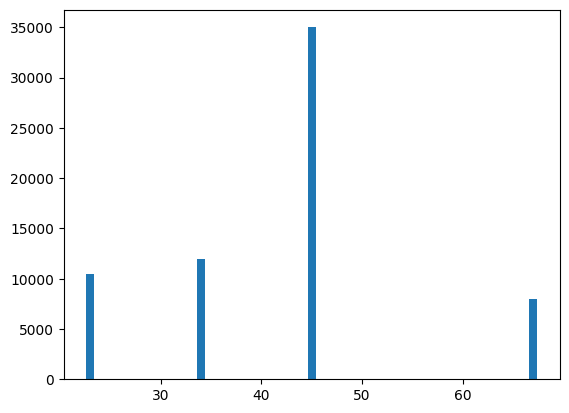

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [23, 45, 67, 34]
y = [10500, 35000, 8000, 12000]

plt.bar(x, y)

In [ ]:
try:
  a = 1 / 0
except:
  print("No se pudo realizar la operación")

No se pudo realizar la operación


## Conectar una base de datos SQL Server

In [ ]:
import pymssql

server = "3.93.192.216"
dbname = "test_curso"
user = "test_curso"
password = "TestCurso$123"

conn = pymssql.connect(server, user, password, dbname)

cursor = conn.cursor()

cursor.execute("select @@version")

row = cursor.fetchone()

print(row[0])

Microsoft SQL Server 2019 (RTM-CU25) (KB5033688) - 15.0.4355.3 (X64) 
	Jan 30 2024 17:02:22 
	Copyright (C) 2019 Microsoft Corporation
	Express Edition (64-bit) on Windows Server 2019 Datacenter 10.0 <X64> (Build 17763: ) (Hypervisor)



In [ ]:
cursor.execute("select id, name from foo")

max_id = None

for row in cursor.fetchall():
  print(f"ID: {row[0]} | NAME: {row[1]}")
  if max_id == None or row[0] > max_id:
    max_id = row[0]

print()
print(f"MAX ID: {max_id}")

ID: 1 | NAME: Nombre Ejemplo
ID: 2 | NAME: Otro Ejemplo
ID: 3 | NAME: Tercer Ejemplo
ID: 4 | NAME: Probando desde DBeaver
ID: 5 | NAME: Hola mundo 5147
ID: 6 | NAME: Hola mundo 1059
ID: 7 | NAME: Hola mundo 6707
ID: 8 | NAME: Hola mundo 3618
ID: 9 | NAME: Hola mundo 3006
ID: 15 | NAME: Scotia

MAX ID: 15


In [ ]:
import random

id = max_id + 1
name = f"Hola mundo {random.randint(1, 10_000)}"

cursor.execute("insert into foo (id, name) values (%d, %s)", (id, name))

In [ ]:
conn.commit()

In [ ]:
sql = """
create table bar (
  id int primary key,
  title varchar(255)
)
"""

cursor.execute(sql)

conn.commit()

In [ ]:
actividades = ["Comprar", "Escuchar", "Lavar", "Devolver"]
objetos = ["huevo", "leche", "galletas", "música", "videos", "a la abuela", "ropa", "los tenis", "la camisa", "el estéreo"]

import random

print("Se crearán 5 TODOS")
print("=" * 80)

for i in range(5):
  cursor.execute("select top(1) id, username from users order by newid()")
  user_id, username = cursor.fetchone()
  print(f"Username: {username} ({user_id})")
  title = random.choice(actividades) + " " + random.choice(objetos)
  description = f"El usuario hará la tarea de: {title}"
  print(title)
  print(description)
  print("-" * 80)
  cursor.execute(
      """
      insert into todos (user_id, title, description, checked, create_at)
      values (%d, %s, %s, 0, sysdatetime())
      """,
      (user_id, title, description)
  )

print("=" * 80)
print("Se crearon los 5 TODOS, vamos a insertarlos")

conn.commit()


Se crearán 5 TODOS
Username: daniela98 (3)
Comprar a la abuela
El usuario hará la tarea de: Comprar a la abuela
--------------------------------------------------------------------------------
Username: daniela98 (3)
Devolver ropa
El usuario hará la tarea de: Devolver ropa
--------------------------------------------------------------------------------
Username: daniela98 (3)
Escuchar huevo
El usuario hará la tarea de: Escuchar huevo
--------------------------------------------------------------------------------
Username: paty123 (1)
Lavar el estéreo
El usuario hará la tarea de: Lavar el estéreo
--------------------------------------------------------------------------------
Username: daniela98 (3)
Devolver leche
El usuario hará la tarea de: Devolver leche
--------------------------------------------------------------------------------
Se crearon los 5 TODOS, vamos a insertarlos
